In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hrtrain=pd.read_csv(r"C:\Users\Dell\Downloads\train_LZdllcl.csv")

In [3]:
hrtest=pd.read_csv(r"C:\Users\Dell\Downloads\test_2umaH9m (1).csv")

In [4]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
hrtrain.education.value_counts(dropna=False) # Impute NA's with "Bachelor's"

education
Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: count, dtype: int64

In [7]:
hrtrain.education=hrtrain.education.fillna(hrtrain.education.value_counts().idxmax())
# idxmax() will index of maximum frequency in value_counts() table

In [8]:
hrtest.education=hrtest.education.fillna(hrtest.education.value_counts().idxmax())

In [9]:
hrtrain.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: count, dtype: int64

In [10]:
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [11]:
hrtest.previous_year_rating=hrtest.previous_year_rating.fillna(3.0)

In [12]:
# Split Data into numcols & objectcols
numcols=hrtrain[['no_of_trainings', 'age','length_of_service','avg_training_score']]

objectcols=hrtrain[['department', 'region', 'education', 'gender','recruitment_channel',
                    'KPIs_met >80%', 'awards_won?','is_promoted']]

In [13]:
# EDA on Numeric Data  - describe() , skew() & kurt() - Univariate Statistics
# Histogram, Boxplot and Density Curve - avg_training_score - Univariate Plots
# Correlation and Heatmap - numcols - Bivariate Statistics & Plots

In [14]:
# EDA on Numeric Data  - describe() , skew() & kurt() - Univariate Statistics
print(numcols.describe())
print("Skewness:",numcols.skew())
print("Kurtosis:",numcols.kurt())

       no_of_trainings           age  length_of_service  avg_training_score
count     54808.000000  54808.000000       54808.000000        54808.000000
mean          1.253011     34.803915           5.865512           63.386750
std           0.609264      7.660169           4.265094           13.371559
min           1.000000     20.000000           1.000000           39.000000
25%           1.000000     29.000000           3.000000           51.000000
50%           1.000000     33.000000           5.000000           60.000000
75%           1.000000     39.000000           7.000000           76.000000
max          10.000000     60.000000          37.000000           99.000000
Skewness: no_of_trainings       3.445434
age                   1.007432
length_of_service     1.738061
avg_training_score    0.451908
dtype: float64
Kurtosis: no_of_trainings       18.740082
age                    0.792353
length_of_service      4.414031
avg_training_score    -1.049649
dtype: float64


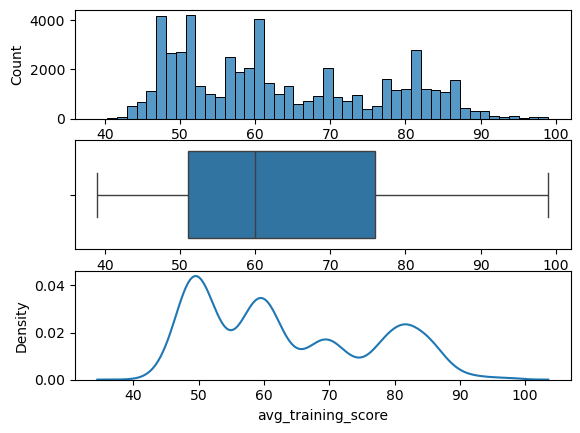

In [15]:
import seaborn as sns
fig,ax=plt.subplots(3,1)
sns.histplot(hrtrain.avg_training_score,ax=ax[0])
sns.boxplot(hrtrain.avg_training_score,ax=ax[1],orient="h")
sns.kdeplot(hrtrain.avg_training_score,ax=ax[2])
plt.show()

In [16]:
sns.heatmap(numcols.corr(),annot=True)

<Axes: >

In [17]:
sns.pairplot(numcols) # Bivariate Plot - Scatter Plot

In [18]:
# Frequency Counts of all object cols
for col in objectcols.columns:
    freq=objectcols[col].value_counts()
    print(freq)

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
education
Bachelor's          39078
Maste

In [19]:
# What is Average avg_training_score for different gender?
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [20]:
# What is Average avg_training_score for different kpismet?
hrtrain.avg_training_score.groupby(hrtrain['KPIs_met >80%']).mean()

KPIs_met >80%
0    62.614241
1    64.809030
Name: avg_training_score, dtype: float64

In [21]:
# What is Average avg_training_score for different recruitment channel?
hrtrain.avg_training_score.groupby(hrtrain.recruitment_channel).mean()

recruitment_channel
other       63.362839
referred    66.182137
sourcing    63.280620
Name: avg_training_score, dtype: float64

In [22]:
# What is Average length_of_service for different education?
hrtrain.length_of_service.groupby(hrtrain.education).mean()

education
Bachelor's          5.286760
Below Secondary     1.704348
Master's & above    7.605293
Name: length_of_service, dtype: float64

In [23]:
# What is Average lenght_of_service for different department?
hrtrain.length_of_service.groupby(hrtrain.department).mean()

department
Analytics            4.932735
Finance              4.819401
HR                   5.683623
Legal                4.599615
Operations           6.416020
Procurement          6.331045
R&D                  4.554555
Sales & Marketing    5.912292
Technology           5.914822
Name: length_of_service, dtype: float64

In [24]:
# What is Average avg_trainig_score for different department?
hrtrain.avg_training_score.groupby(hrtrain.department).mean()

department
Analytics            84.602952
Finance              60.222003
HR                   50.018197
Legal                59.868142
Operations           60.226648
Procurement          70.122443
R&D                  84.596597
Sales & Marketing    50.261698
Technology           79.928692
Name: avg_training_score, dtype: float64

In [25]:
# Test Null Average avg_training_score for different gender equal.
# split data, Frame Null & Alt, Conduct test & Interpret 
# Exactly 2 levels/classes - 2 Sample Independent T test

male=hrtrain[hrtrain.gender=="m"]
female=hrtrain[hrtrain.gender=="f"]

# Null - There is no significant difference in Average avg_training_score of male&female
# Alt - There is significant difference in Average avg_training_score of male&female

In [26]:
from scipy.stats import ttest_ind

In [27]:
ttest_ind(male.avg_training_score,female.avg_training_score,equal_var=False)
# Since pvalue=9.321257169457854e-10 is less than 0.05, Reject Null

TtestResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10, df=35820.249659813104)

In [28]:
# Test Null Average avg_training_score for different recruitment_channel equal.
# split data, Frame Null & Alt, Conduct test & Interpret 
# more than 2 levels/classes -Anova Single Factor

referal=hrtrain[hrtrain.recruitment_channel=="referred"]
source=hrtrain[hrtrain.recruitment_channel=="sourcing"]
other=hrtrain[hrtrain.recruitment_channel=="other"]

# Null - There is no significant difference in Average avg_training_score of different
# recruitment channl
# Alt - There is significant difference in Average avg_training_score of different
# recruitment channel

In [29]:
from scipy.stats import f_oneway

In [30]:
f_oneway(referal.avg_training_score,source.avg_training_score,other.avg_training_score)
# Since pvalue=6.585805990029605e-12 is less than 0.05, Reject Null

F_onewayResult(statistic=25.758203095600138, pvalue=6.585805990029605e-12)

In [31]:
# Test Null No Association between gender and is_promoted
# Both variables non numeric categorical - Chi Square test of independence

# Null - There is no association between both variables
# Alt - There is association between both variables

from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))
# Since pvalue=0.009765091521176657 is less thn 0.05, Reject null

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [32]:
# Dummy Variable encoding
objectcols_dummy=pd.get_dummies(objectcols,columns=['department', 'region', 'education', 
                                                    'gender', 'recruitment_channel',
                                                    'KPIs_met >80%', 'awards_won?'])

In [33]:
# Concatenate numcols & objectcols_dummy - Column Concatenation
hrtrain_df=pd.concat([numcols,objectcols_dummy],axis=1)

In [34]:
# Split data into dependent variable(y) & Independent Variables(X)
y=hrtrain_df.is_promoted
X=hrtrain_df.drop('is_promoted',axis=1)

In [35]:
# LabelEncode dependent variable (y)
from sklearn.preprocessing import LabelEncoder

In [36]:
y=LabelEncoder().fit_transform(y)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logit=LogisticRegression(max_iter=2000)

In [39]:
logitmodel=logit.fit(X,y)

In [40]:
logitmodel.score(X,y) # Accuracy from Confusion matrix

0.9316888045540797

In [43]:
logitpredict=logitmodel.predict(X)

In [45]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     50140
           1       0.81      0.26      0.39      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.92      0.93      0.91     54808

